In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/human-activity/train.csv
/kaggle/input/human-activity/test.csv


<font color='green' size = '12'>1) Importing Libraries </font>

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from collections import Counter

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


<font color = 'green' size = '12'>2) Loading Data</font>

In [3]:
train = pd.read_csv('/kaggle/input/human-activity/train.csv')
test = pd.read_csv('/kaggle/input/human-activity/test.csv')
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


The above train set data contains 563 different features and 7352 rows. These are so many features to analyze or put in a model. Therefore we will use dimensionality reduction technique (pca, tsne)

In [5]:
train.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [6]:
test.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [7]:
print('Duplicate values in train data :',train.duplicated().sum())
print('Duplicate values in test data :',test.duplicated().sum())

Duplicate values in train data : 0
Duplicate values in test data : 0


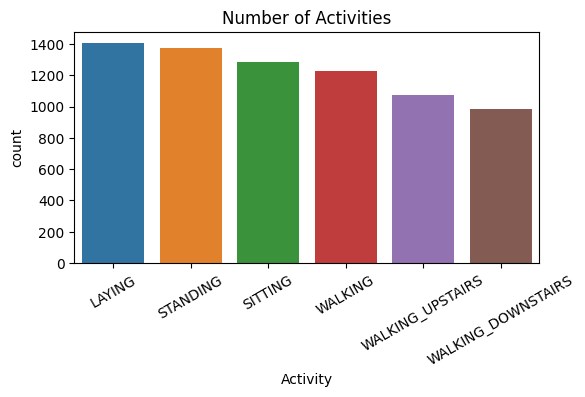

In [8]:
plt.figure(figsize = (6,3))
plt.title('Number of Activities')
sns.countplot(train, x = 'Activity', order = train.Activity.value_counts().index)
plt.xticks(rotation  = 30)
plt.show()

<font color = 'green' size = '12'>3) Exploratory Data Analysis</font>

In [9]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [10]:
pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in train.columns]), orient = 'index').rename(columns = {0:'count'}).sort_values('count', ascending = False)


,count
fBodyAcc,79
fBodyGyro,79
fBodyAccJerk,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


acceleration, gravity, jerk, angle, subject, gyro

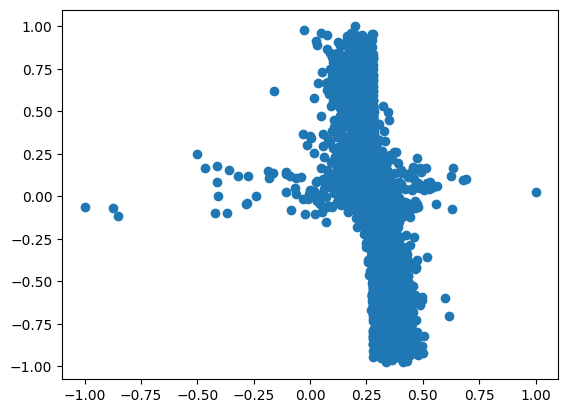

In [11]:
plt.scatter(data = train, x ='tBodyAcc-mean()-X', y = 'angle(tBodyAccMean,gravity)' )

Text(0.25, 4, 'Dynamic Activities')

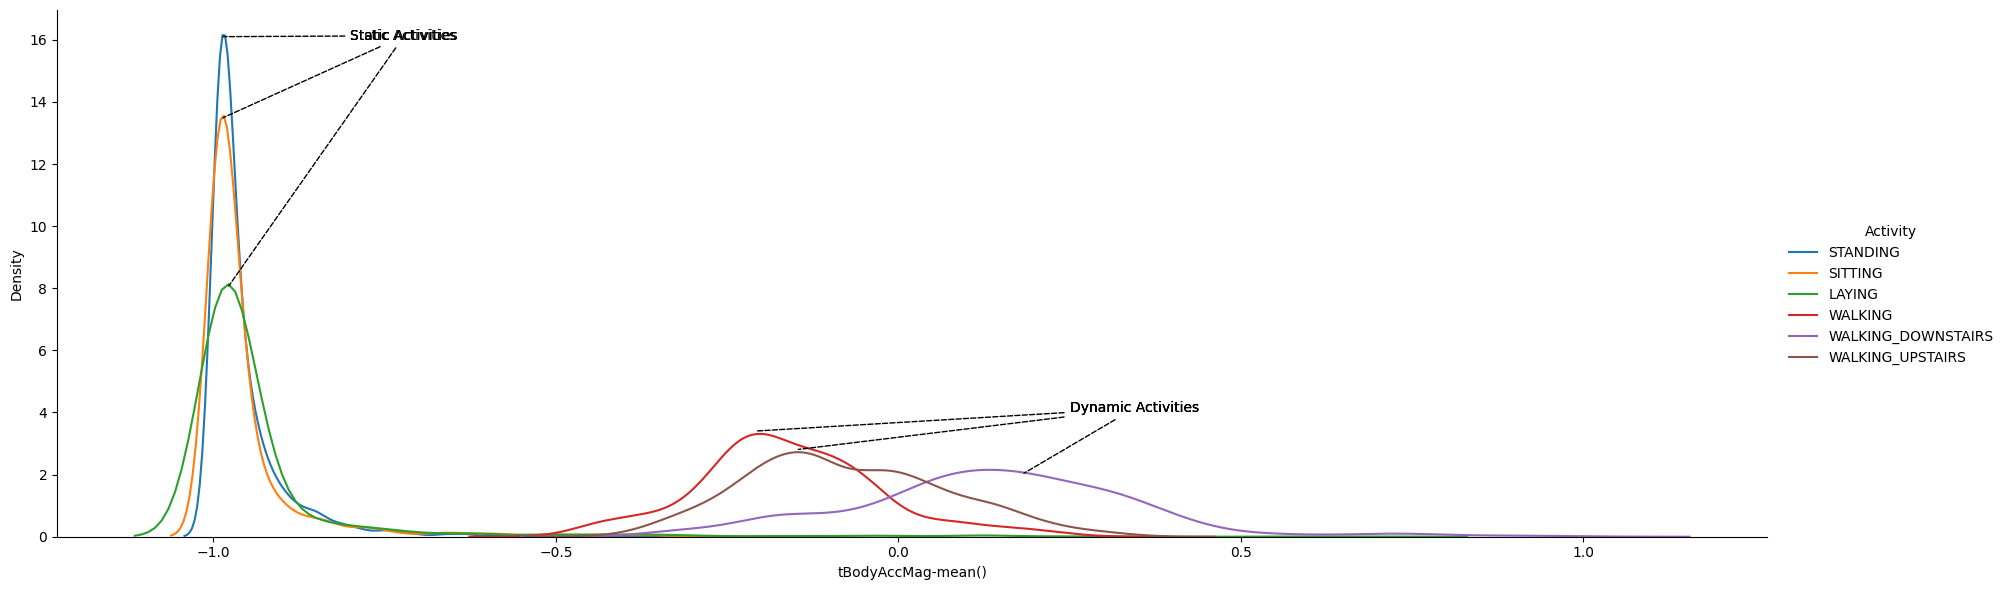

In [12]:
facetgrid = sns.FacetGrid(train, hue = 'Activity', height = 6, aspect = 3)
facetgrid.map(sns.distplot, 'tBodyAccMag-mean()', hist = False).add_legend()
plt.annotate('Static Activities', xy=(-0.98,8), xytext=(-0.8,16), arrowprops={'arrowstyle':'-', 'ls':'dashed'})
plt.annotate('Static Activities', xy=(-0.99,13.45), xytext = (-0.8,16), arrowprops = {'arrowstyle':'-', 'ls':'dashed'})
plt.annotate('Ststic Activities', xy = (-0.99, 16.1), xytext = (-0.8,16), arrowprops = {'arrowstyle':'-', 'ls':'dashed'})

plt.annotate('Dynamic Activities', xy = (-0.21,3.4), xytext = (0.25,4), arrowprops = {'arrowstyle':'-', 'ls':'dashed'})
plt.annotate('Dynamic Activities', xy = (-0.15,2.8), xytext = (0.25,4), arrowprops = {'arrowstyle':'-', 'ls':'dashed'})
plt.annotate('Dynamic Activities', xy = (0.18,2), xytext = (0.25,4), arrowprops = {'arrowstyle':'-', 'ls':'dashed'})

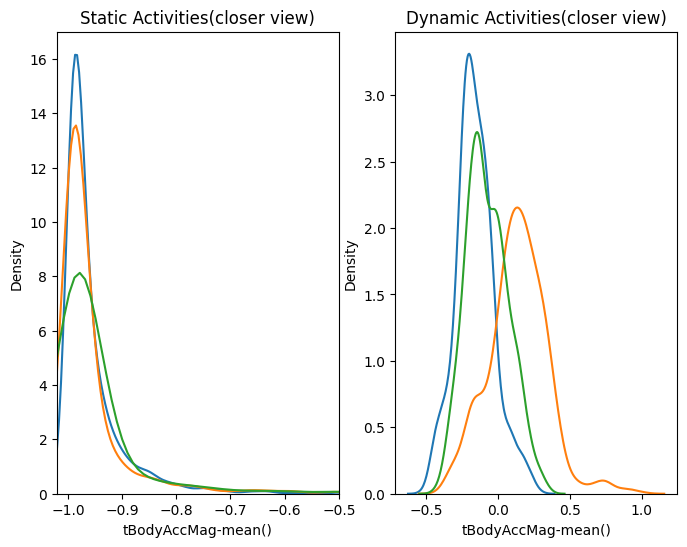

In [13]:
plt.figure(figsize = (8,6))
plt.subplot(1,2,1)
plt.title('Static Activities(closer view)')
sns.distplot(train[train['Activity']=='STANDING']['tBodyAccMag-mean()'], hist = False, label = 'Standing')
sns.distplot(train[train['Activity']=='SITTING']['tBodyAccMag-mean()'], hist = False, label = "Sitting")
sns.distplot(train[train['Activity']=='LAYING']['tBodyAccMag-mean()'], hist = False, label = "Laying")
plt.axis([-1.02,-0.5,0,17])

plt.subplot(1,2,2)
plt.title('Dynamic Activities(closer view)')
sns.distplot(train[train['Activity']=='WALKING']['tBodyAccMag-mean()'], hist = False, label = 'Walking')
sns.distplot(train[train['Activity']=='WALKING_DOWNSTAIRS']['tBodyAccMag-mean()'], hist = False, label = 'Walking_Downstairs')
sns.distplot(train[train['Activity']=='WALKING_UPSTAIRS']['tBodyAccMag-mean()'], hist = False, label = 'Walking_Upstairs')
plt.show()

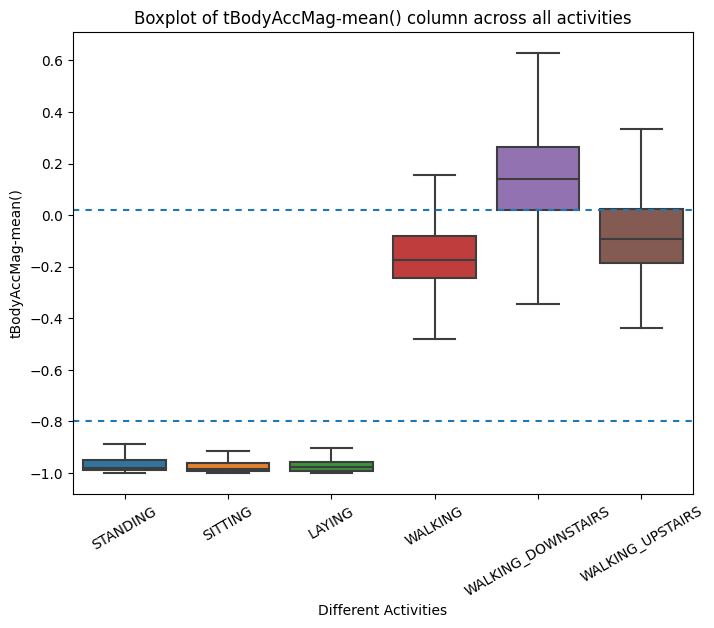

In [14]:
plt.figure(figsize = (8,6))
sns.boxplot(data = train, x = 'Activity', y = 'tBodyAccMag-mean()' , showfliers = False )
plt.title('Boxplot of tBodyAccMag-mean() column across all activities')
plt.xlabel('Different Activities')
plt.ylabel('tBodyAccMag-mean()')
plt.axhline(y = -0.8, xmin = 0, dashes = (3,3) )
plt.axhline(y = 0.02, xmin = 0, dashes = (3,3))
plt.xticks(rotation = 30)
plt.show()

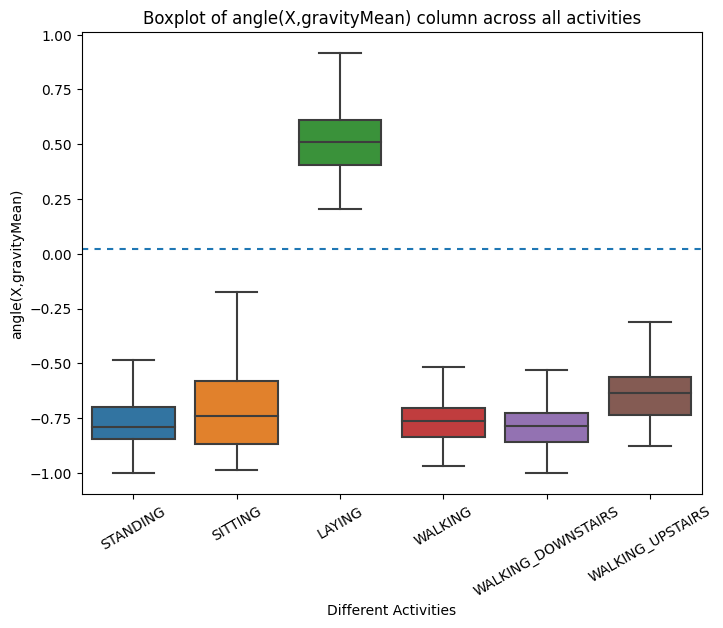

In [15]:
plt.figure(figsize = (8,6))
sns.boxplot(data = train, x = 'Activity', y = 'angle(X,gravityMean)' , showfliers = False )
plt.title('Boxplot of angle(X,gravityMean) column across all activities')
plt.xlabel('Different Activities')
plt.ylabel('angle(X,gravityMean)')
plt.axhline(y = 0.02, xmin = 0, dashes = (3,3))
plt.xticks(rotation = 30)
plt.show()

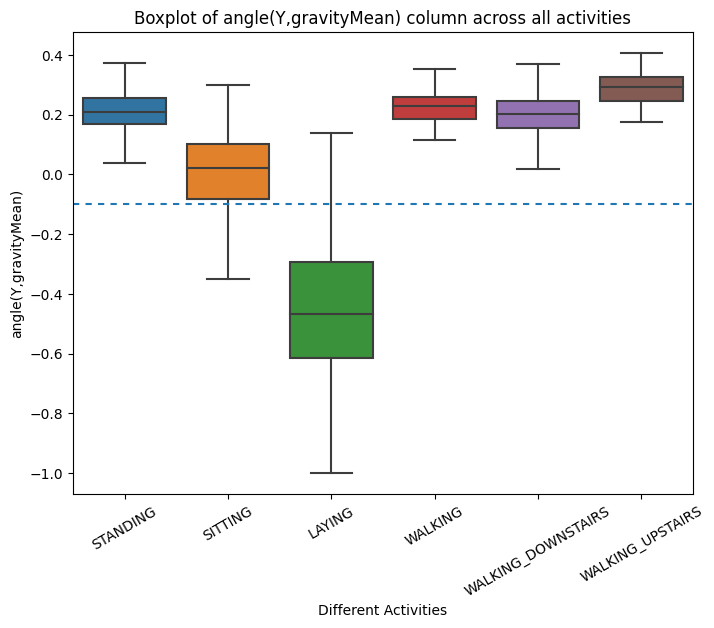

In [16]:
plt.figure(figsize = (8,6))
sns.boxplot(data = train, x = 'Activity', y = 'angle(Y,gravityMean)' , showfliers = False )
plt.title('Boxplot of angle(Y,gravityMean) column across all activities')
plt.xlabel('Different Activities')
plt.ylabel('angle(Y,gravityMean)')
plt.axhline(y = -0.1, xmin = 0, dashes = (3,3))
plt.xticks(rotation = 30)
plt.show()

<font color = 'green' size = 12>4) Feature Engineering</font>

<font color ='blue' size = '6'>a) PCA</font>

In [17]:
x_for_pca = train.drop(['subject', 'Activity'], axis = 1)
pca = PCA(n_components = 2, random_state=0).fit_transform(x_for_pca)
pca

array([[-5.5202803 , -0.29027701],
       [-5.53534954, -0.08253011],
       [-5.47498801,  0.28738703],
       ...,
       [ 5.85750527, -3.08184312],
       [ 5.42109482, -3.42643002],
       [ 5.49797027, -2.78992867]])

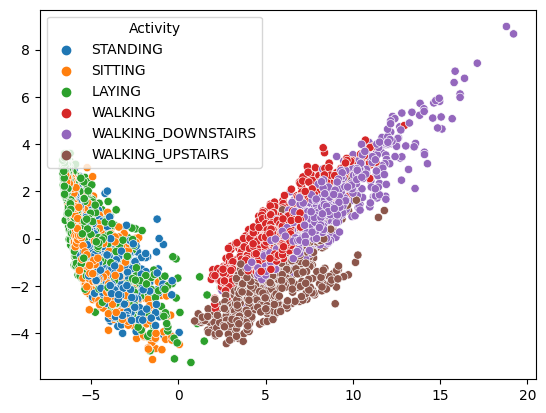

In [18]:
sns.scatterplot(x = pca[:,0], y = pca[:,1], hue = train['Activity'])
plt.show()

<font color ='blue' size = '6'>b) TSNE</font>

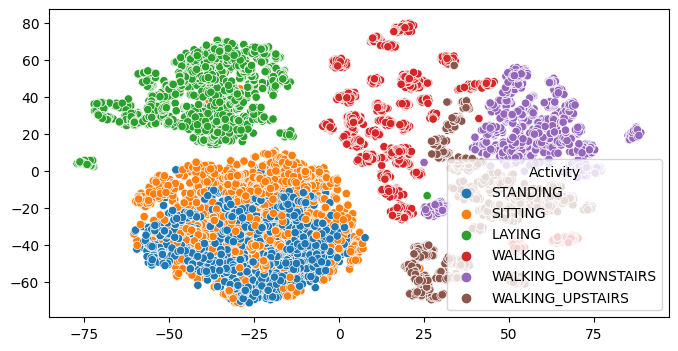

In [19]:
x_for_tsne = train.drop(['subject','Activity'], axis =1 )
tsne = TSNE(n_components = 2, random_state = 0).fit_transform(x_for_tsne)
plt.figure(figsize = (8,4))
sns.scatterplot(x = tsne[:,0], y = tsne[:,1], hue = train['Activity'])
plt.show()

<font color = 'green' size = '12'>5) ML Model</font>

In [20]:
xtrain = train.drop(['subject', 'Activity'], axis = 1)
ytrain = train['Activity']

In [21]:
xtest = test.drop(['subject', 'Activity'], axis = 1)
ytest = test['Activity']

<font color = 'blue' size = '4'>5) a) Logistic Regression model</font>

In [22]:
lr_classifier = LogisticRegression()
lr_classifier.fit(xtrain, ytrain)
y_pred_lr = lr_classifier.predict(xtest)
accuracy_score(ytest, y_pred_lr)

0.954954954954955

<font color = 'blue' size = '4'>5) b) Logistic Regression model with hyperparameter tuning and cross validation</font>

In [23]:
parameters = {'max_iter' : [100,200,500]}
lr_classifier_rs = RandomizedSearchCV(lr_classifier, param_distributions = parameters, cv = 5, random_state = 42)
lr_classifier_rs.fit(xtrain, ytrain)
y_pred_lr_rs = lr_classifier_rs.predict(xtest)
accuracy_score(ytest, y_pred_lr_rs)


0.954954954954955

<font color = 'blue' size = '3'>Function to plot confusion matrix</font>

In [24]:
def plot_confusion_matrix(cm, labels):
    fig, ax = plt.subplots(figsize = (12,8)) # for plotting confusion matrix as large
    im = ax.imshow(cm,interpolation = 'nearest', cmap = plt.cm.Blues)
    ax.figure.colorbar(im, ax = ax)
    ax.set(xticks = np.arange(cm.shape[1]),
           yticks = np.arange(cm.shape[0]),
           xticklabels = labels,
           yticklabels = labels,
           ylabel = 'True label',
           xlabel = 'Predicted label')
    plt.xticks(rotation = 90)
    thresh = cm.max()/2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, int(cm[i,j]), ha = 'center', va = 'center', color = 'white' if cm[i,j] > thresh else 'black')
    fig.tight_layout()

In [25]:
cm = confusion_matrix(ytest.values, y_pred_lr)
cm

array([[183,   0,   0,   0,   0,   0],
       [  0, 148,  19,   0,   0,   3],
       [  0,  11, 167,   0,   0,   0],
       [  0,   0,   0, 185,   0,   0],
       [  0,   0,   0,   0, 134,   0],
       [  0,   0,   0,  12,   0, 137]])

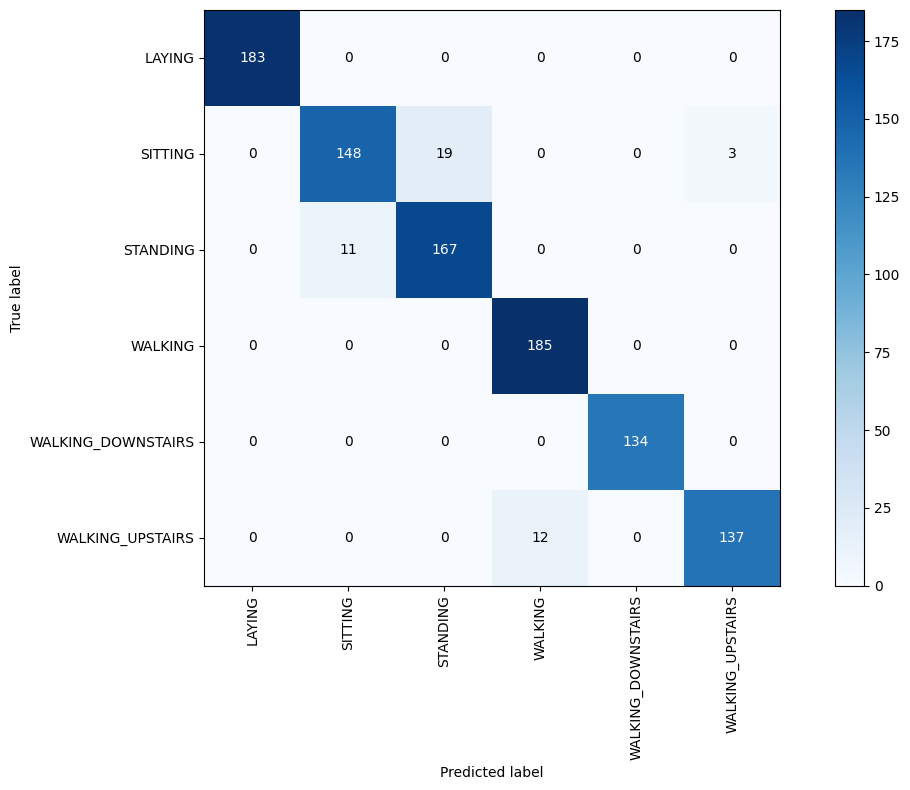

In [26]:
cm = confusion_matrix(ytest.values, y_pred_lr)
plot_confusion_matrix(cm, np.unique(y_pred_lr))

In [27]:
#functiom to get best random search attributes

def get_best_randomsearch_results(model):
    print('Best estimator : ', model.best_estimator_)
    print('Best set of parameters : ', model.best_params_)
    #print('Best score : ', model.best_score_)

In [28]:
# getting best random search attribute

get_best_randomsearch_results(lr_classifier_rs)

Best estimator :  LogisticRegression(max_iter=500)
Best set of parameters :  {'max_iter': 500}



<font color = 'blue' size = '3'>5) c) kernel SVM model with hyperparameter tuning and cross validation</font>

In [29]:
parameters = {'kernel':['linear', 'rbf', 'poly', 'sigmoid'], 'C':[100,50]}
svm_rs = RandomizedSearchCV(SVC(), param_distributions = parameters, cv = 3, random_state = 42)
svm_rs.fit(xtrain, ytrain)

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': [100, 50],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']},
                   random_state=42)

In [30]:
y_pred_svm = svm_rs.predict(xtest)

In [31]:
kernel_svm_accuracy = accuracy_score(ytest, y_pred_svm)
kernel_svm_accuracy

0.965965965965966

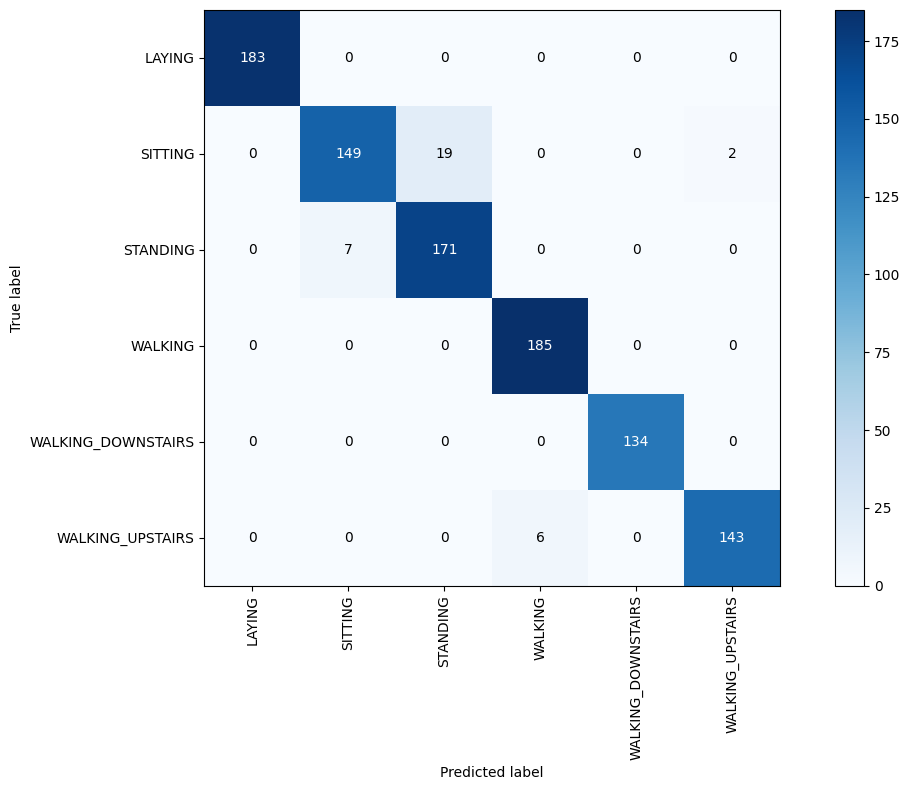

In [32]:
cm = confusion_matrix(ytest.values, y_pred_svm)
plot_confusion_matrix(cm, np.unique(y_pred_svm))

In [33]:
get_best_randomsearch_results(svm_rs)

Best estimator :  SVC(C=50)
Best set of parameters :  {'kernel': 'rbf', 'C': 50}


<font color = 'blue' size = '3'>5) d) Decision Tree model Hyper parameter tuning and cross validation</font>

In [34]:
parameters = {'max_depth' : np.arange(2,10,2)}
dt_classifier = DecisionTreeClassifier()
dt_classifier_rs = RandomizedSearchCV(dt_classifier, param_distributions = parameters, random_state = 42)
dt_classifier_rs.fit(xtrain, ytrain)
y_pred_dt = dt_classifier_rs.predict(xtest)
dt_accuracy = accuracy_score(ytest, y_pred_dt)
dt_accuracy

0.8578578578578578

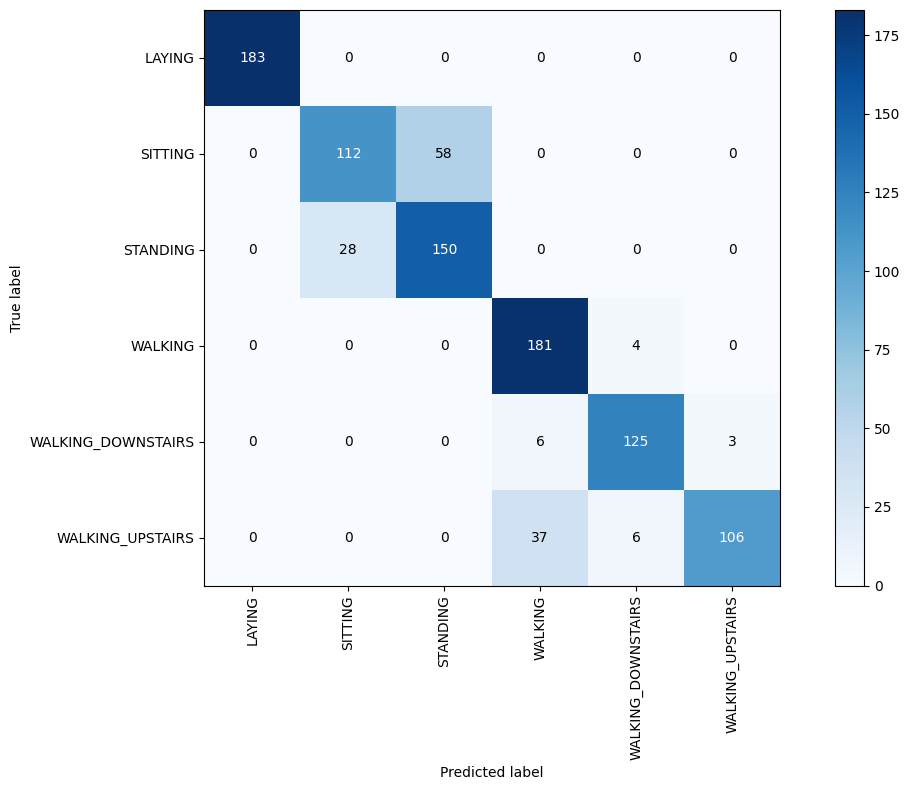

In [35]:
cm = confusion_matrix(ytest.values, y_pred_dt)
plot_confusion_matrix(cm, np.unique(y_pred_dt))

In [36]:
get_best_randomsearch_results(dt_classifier_rs)

Best estimator :  DecisionTreeClassifier(max_depth=8)
Best set of parameters :  {'max_depth': 8}


<font color = 'blue' size = '3'>5) e) Random Forest model with hyper parameter tuning and cross validation</font>

In [38]:
parameters = {'n_estimators' : np.arange(20,101,10), 'max_depth' : np.arange(2,17,2)}
rf_classifier = RandomForestClassifier()
rf_classifier_rs = RandomizedSearchCV(rf_classifier, param_distributions = parameters, random_state = 42)
rf_classifier_rs.fit(xtrain, ytrain)
y_pred_rf = rf_classifier_rs.predict(xtest)
rf_accuracy = accuracy_score(ytest, y_pred_rf)

In [39]:
rf_accuracy

0.9049049049049049

In [40]:
get_best_randomsearch_results(rf_classifier_rs)

Best estimator :  RandomForestClassifier(max_depth=12, n_estimators=70)
Best set of parameters :  {'n_estimators': 70, 'max_depth': 12}


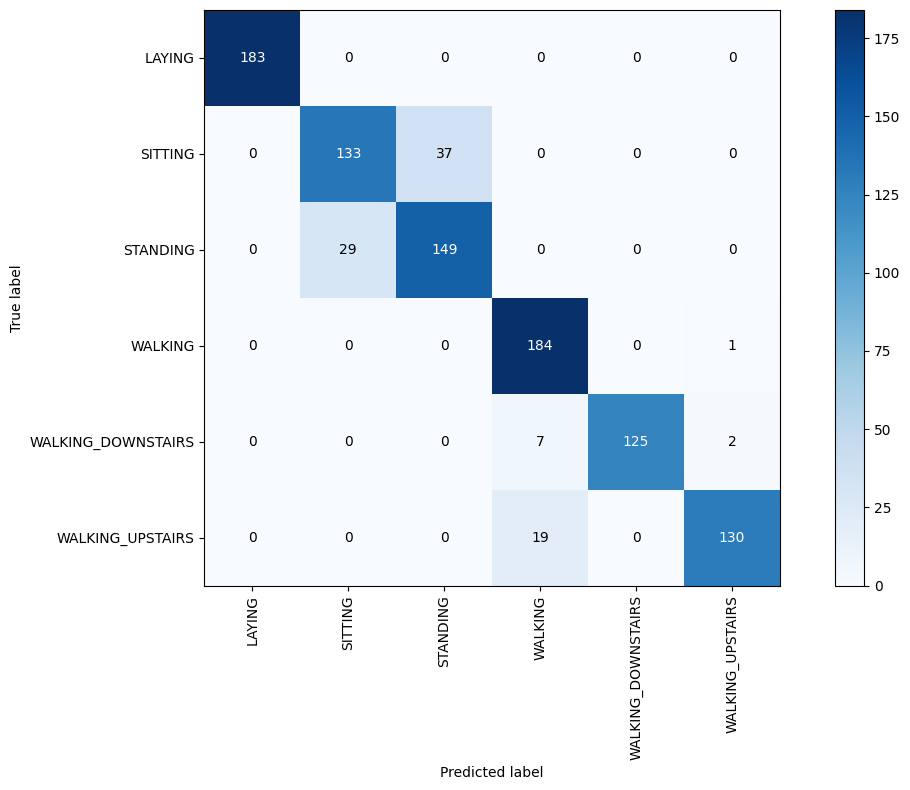

In [41]:
cm = confusion_matrix(ytest.values, y_pred_rf)
plot_confusion_matrix(cm, np.unique(y_pred_rf))